In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/netflix_users.csv')
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [4]:
# 한글 폰트 설정 (사용자 시스템에 따라 변경 필요)
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop
plt.rcParams['axes.unicode_minus'] = False


In [5]:
print(df.shape)
print(df.dtypes)
print("")
print(df.describe())
print("")
print(df.isnull) # 결측치없음



(25000, 8)
User_ID                int64
Name                  object
Age                    int64
Country               object
Subscription_Type     object
Watch_Time_Hours     float64
Favorite_Genre        object
Last_Login            object
dtype: object

            User_ID           Age  Watch_Time_Hours
count  25000.000000  25000.000000      25000.000000
mean   12500.500000     46.482880        500.468858
std     7217.022701     19.594861        286.381815
min        1.000000     13.000000          0.120000
25%     6250.750000     29.000000        256.567500
50%    12500.500000     46.000000        501.505000
75%    18750.250000     63.000000        745.732500
max    25000.000000     80.000000        999.990000

<bound method DataFrame.isnull of        User_ID              Name  Age    Country Subscription_Type  \
0            1    James Martinez   18     France           Premium   
1            2       John Miller   23        USA           Premium   
2            3        Emma Da

In [6]:
print(df.value_counts('User_ID'), end='\n\n')
print(df.value_counts('Name'), end='\n\n')
print(df.value_counts('Age'), end='\n\n')
print(df.value_counts('Country'), end='\n\n')
print(df.value_counts('Subscription_Type'), end='\n\n')
print(df.value_counts('Watch_Time_Hours'), end='\n\n')
print(df.value_counts('Favorite_Genre'), end='\n\n')
print(df.value_counts('Last_Login'), end='\n\n')
print(df.isna().sum())

User_ID
25000    1
1        1
2        1
3        1
4        1
        ..
12       1
13       1
14       1
15       1
16       1
Name: count, Length: 25000, dtype: int64

Name
Michael Hernandez    292
Katie Smith          287
Sarah Brown          287
Jane Williams        278
Jane Johnson         275
                    ... 
Chris Garcia         230
James Davis          228
Jane Garcia          227
Jane Davis           211
Chris Davis          209
Name: count, Length: 100, dtype: int64

Age
26    407
40    406
45    405
57    404
62    400
     ... 
13    339
51    338
73    334
74    330
36    326
Name: count, Length: 68, dtype: int64

Country
UK           2592
Germany      2547
India        2505
Brazil       2503
USA          2503
Mexico       2493
Canada       2490
France       2473
Japan        2457
Australia    2437
Name: count, dtype: int64

Subscription_Type
Premium     8402
Basic       8356
Standard    8242
Name: count, dtype: int64

Watch_Time_Hours
715.37    5
995.15    5
434.

<Axes: >

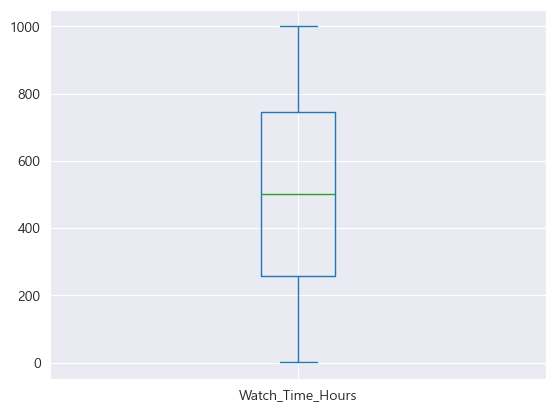

In [7]:
## 04.결측치, 이상치 탐지 Watch_Time_Hours 이상치 탐지
df.duplicated('Watch_Time_Hours').sum()
df['Watch_Time_Hours'].plot(kind='box',)


<Axes: xlabel='Age', ylabel='Count'>

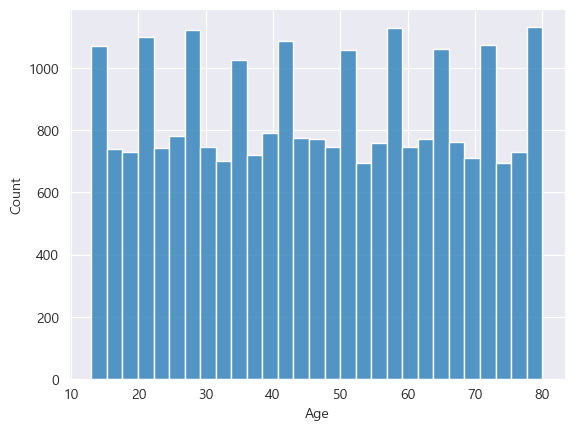

In [8]:
sns.histplot(df['Age']) ##나이 히스토그램

In [75]:
df[df['Favorite_Genre'] == 'Documentary']['Country'].value_counts()

Country
USA          380
France       378
Canada       374
UK           373
Japan        372
Mexico       370
Australia    368
Brazil       348
Germany      340
India        333
Name: count, dtype: int64

In [76]:
df[df['Favorite_Genre'] == 'Action']['Country'].value_counts()

Country
Canada       378
India        372
Germany      370
France       367
Brazil       364
UK           360
USA          360
Mexico       355
Japan        333
Australia    330
Name: count, dtype: int64

In [77]:
df[df['Favorite_Genre'] == 'Romance']['Country'].value_counts()

Country
India        399
Brazil       376
Germany      369
Australia    358
UK           358
Mexico       356
Japan        349
USA          344
France       335
Canada       328
Name: count, dtype: int64

In [78]:
df[df['Favorite_Genre'] == 'Comedy']['Country'].value_counts()

Country
Brazil       373
Germany      372
USA          371
UK           370
Canada       363
India        360
France       347
Mexico       344
Japan        331
Australia    330
Name: count, dtype: int64

In [79]:
df[df['Favorite_Genre'] == 'Drama']['Country'].value_counts()

Country
USA          378
Japan        371
Canada       368
France       360
UK           359
Australia    348
Mexico       347
Brazil       342
India        331
Germany      329
Name: count, dtype: int64

In [80]:
df[df['Favorite_Genre'] == 'Sci-Fi']['Country'].value_counts()


Country
Germany      385
UK           373
Mexico       366
Australia    352
Japan        340
India        340
Brazil       337
France       322
Canada       321
USA          319
Name: count, dtype: int64

In [89]:
sns.boxplot(x='Age', y='Watch_Time_Hours', data=df

SyntaxError: incomplete input (3767983222.py, line 1)

In [81]:
# 각 나라별 인기있는 장르

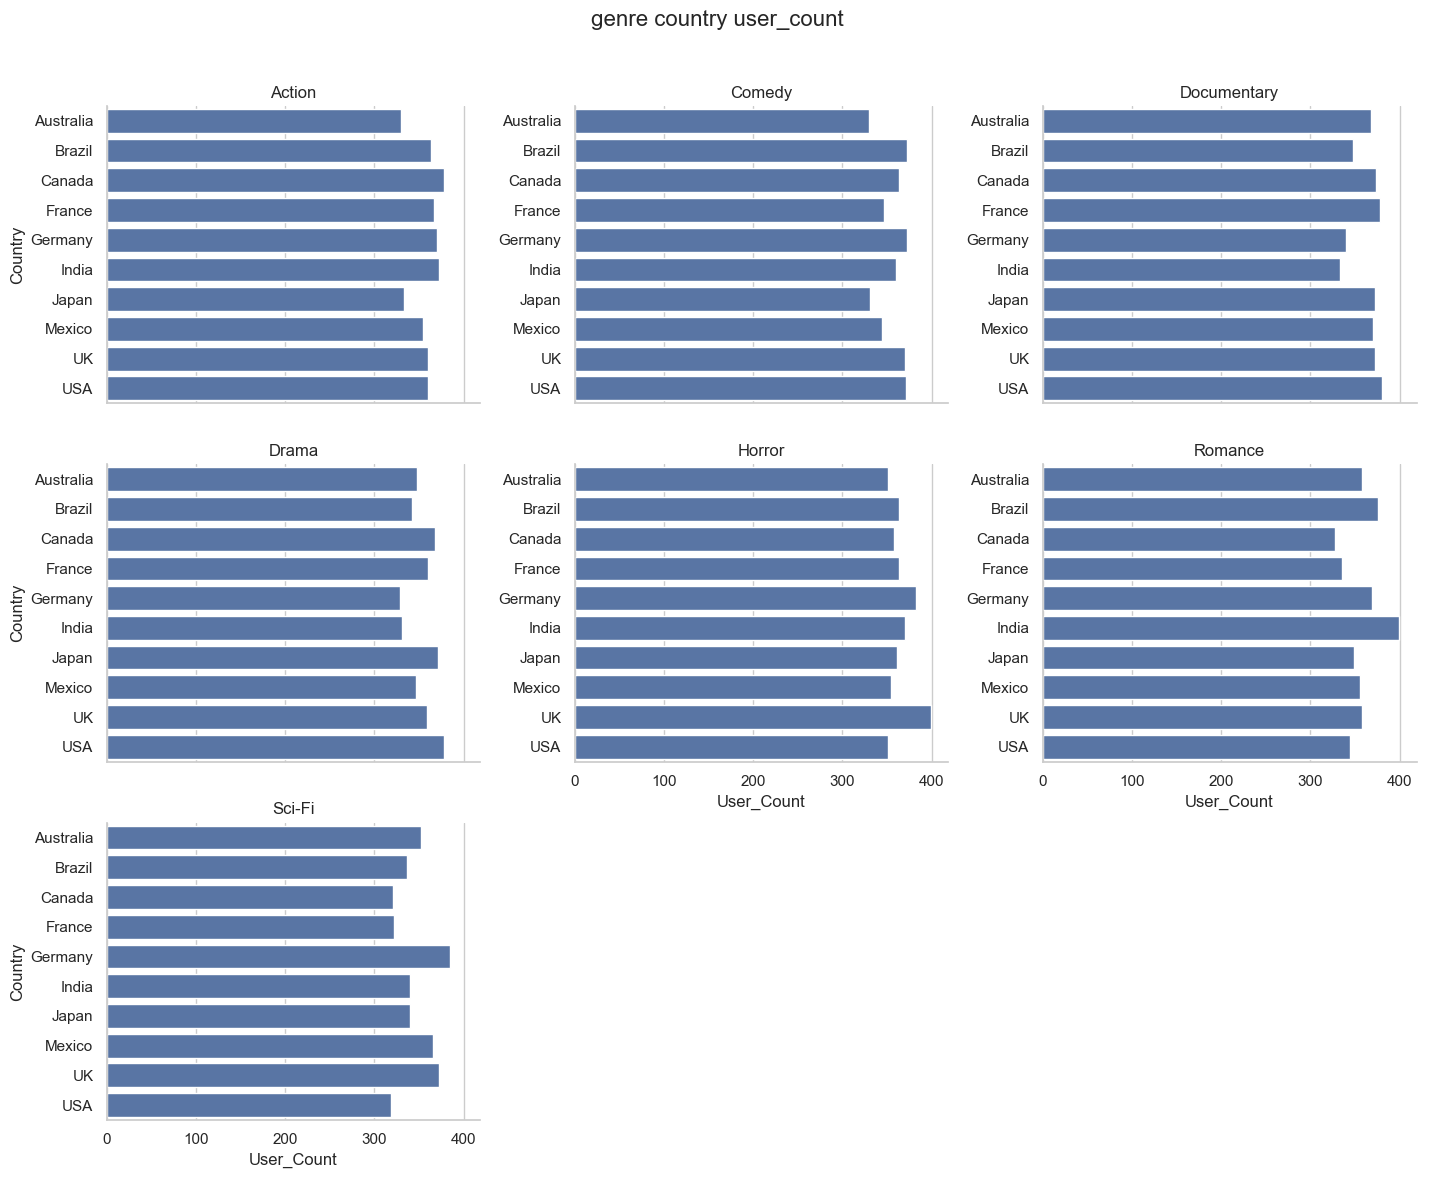

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 대상 장르 리스트
genres = ['Horror', 'Documentary', 'Action', 'Romance', 'Comedy', 'Drama', 'Sci-Fi']

# 해당 장르만 필터링
filtered_df = df[df['Favorite_Genre'].isin(genres)]

# 장르별 국가별 사용자 수 집계
genre_country_counts = filtered_df.groupby(['Favorite_Genre', 'Country']).size().reset_index(name='User_Count')

# 시각화
sns.set(style="whitegrid")
g = sns.catplot(
    data=genre_country_counts,
    x="User_Count", y="Country",
    col="Favorite_Genre",
    kind="bar",
    col_wrap=3,
    height=4, aspect=1.2,
    sharey=False
)

g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("genre country user_count", fontsize=16)
plt.show()


In [88]:
import pandas as pd
from datetime import datetime, timedelta

# 예시 데이터 (df['Last_Login']가 이미 datetime 형식이어야 합니다.)
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')  # 'coerce'는 변환할 수 없는 값을 NaT로 처리

# 기준 날짜: 2021년 9월 25일
latest_addition_date = datetime(2021, 9, 25)

# 기준 날짜로부터 한 달 전 날짜 계산
one_month_ago = latest_addition_date - timedelta(days=180)

# 이탈한 사용자 필터링 (기준 날짜로부터 한 달 이상 로그인하지 않은 사용자)
churned_users = df[df['Last_Login'] < one_month_ago]

# 이탈한 사용자 수
num_churned = churned_users.shape[0]

# 전체 사용자 수
num_total = df.shape[0]

# 이탈률 계산
churn_rate = (num_churned / num_total) * 100

# 결과 출력
print(f"이탈한 사용자 수: {num_churned}")
print(f"전체 사용자 수: {num_total}")
print(f"이탈률: {churn_rate:.2f}%")

# 이탈한 사용자 데이터 확인
print(churned_users)


이탈한 사용자 수: 0
전체 사용자 수: 25000
이탈률: 0.00%
Empty DataFrame
Columns: [User_ID, Name, Age, Country, Subscription_Type, Watch_Time_Hours, Favorite_Genre, Last_Login]
Index: []


In [ ]:
# 연령별 시청기간
# 연령별 시청패턴 선호장르
# Last_login인으로 언제 가장 시청률이 높은요일인지

In [14]:
df1 =pd.read_csv('data/KRvideos.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 261291-261292: invalid continuation byte